- Tema 1 Procesarea Semnalelor
- Florian Luca-Paul, CTI, Grupa 461

# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

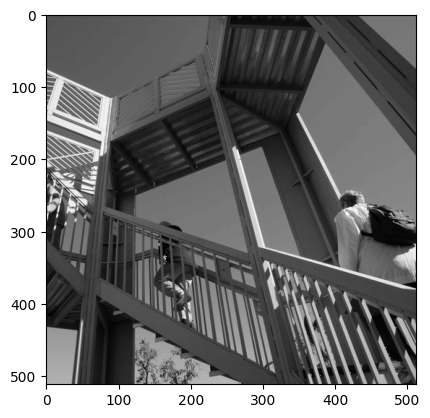

In [2]:
X = datasets.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

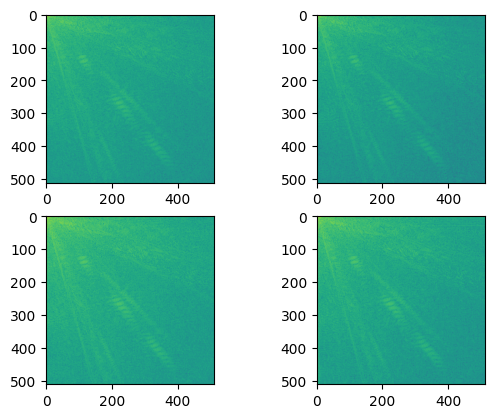

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20 * np.log10(abs(Y1))
freq_db_2 = 20 * np.log10(abs(Y2))
freq_db_3 = 20 * np.log10(abs(Y3))
freq_db_4 = 20 * np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

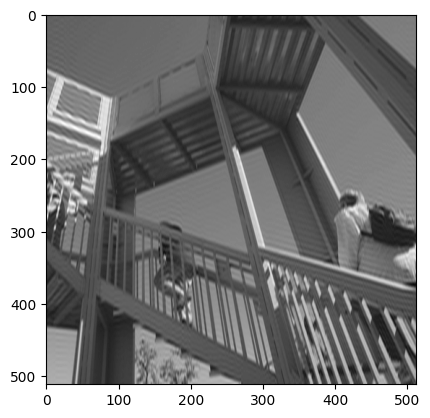

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

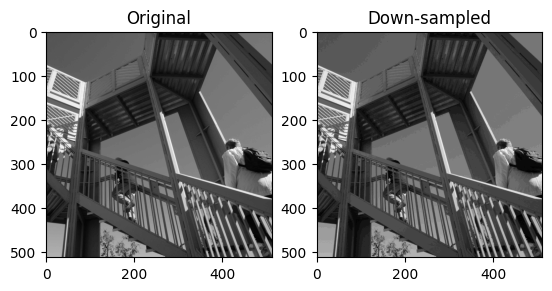

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down * np.round(X_jpeg / Q_down)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

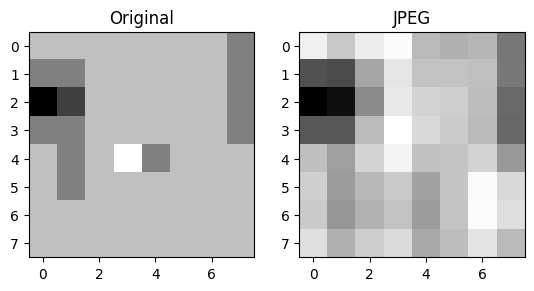

Componente în frecvență: 64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg * np.round(y / Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență: ' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

# Sarcina 1

In [7]:
def jpegBlock(x):
    y = dctn(x)
    y_jpeg = Q_jpeg * np.round(y / Q_jpeg)
    
    return idctn(y_jpeg)

In [16]:
def jpeg(X):
    nr_x = np.int32(X.shape[0] / 8)
    segments_x = [(i * 8, (i + 1) * 8) for i in range(nr_x)] # Impartim latimea in segmente de cate 8
    nr_y = np.int32(X.shape[1] / 8)
    segments_y = [(i * 8, (i + 1) * 8) for i in range(nr_y)] # Impartim lungimea in segmente de cate 8

    chunk_positions = [] # Liniile si coloanele pt. fiecare bloc
    # "Scanarea" se va face pe orizontala
    for i in segments_x:
        for j in segments_y:
            chunk_positions.append((i, j))

    chunks = [] # Blocurile efective, extrase pe baza pozitiilor de mai sus
    for i in range(len(chunk_positions)):
        chunks.append(X[chunk_positions[i][0][0]:chunk_positions[i][0][1], chunk_positions[i][1][0]:chunk_positions[i][1][1]])

    chunks_jpeg = [] # Blocurile, peste care s-a aplicat compresia JPEG
    for x in chunks:
        chunks_jpeg.append(jpegBlock(x))
    
    final_img = np.empty((0, X.shape[1])) # Imaginea finala
    # Completarea se va face, la fel ca si scanarea, tot pe orizontala
    for i in range(nr_x):
        row_img = np.concatenate(chunks_jpeg[(i * nr_y):(i+1) * nr_y], axis=1)
        final_img = np.concatenate((final_img, row_img), axis=0)

    return final_img

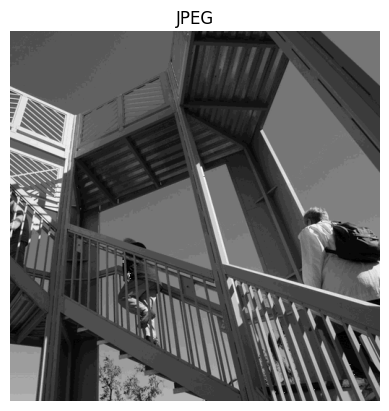

In [46]:
plt.title('JPEG')
plt.imshow(X_jpeg, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Sarcina 2

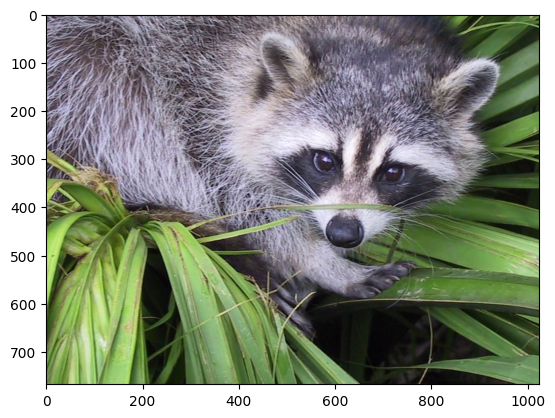

In [24]:
X_RGB = datasets.face()

plt.imshow(X_RGB)
plt.show()

In [303]:
def RGBtoYCbCr(RGB):
    # Sursa conversie: https://www.mir.com/DMG/ycbcr.html
    matrix = np.array([
        [0.299, 0.587, 0.114],
        [-0.168736, -0.331264, 0.500],
        [0.500, -0.418688, -0.081312]
    ])

    rgb = RGB / 255 # RGB -> rgb

    ycbcr = np.empty(3)

    # rgb -> ycbcr
    for i in range(3):
        ycbcr[i] = np.dot(rgb, matrix[i])

    ycbcr[0] = ycbcr[0] * 219 + 16 # y -> Y
    ycbcr[1] = ycbcr[1] * 224 + 128 # cb -> Cb
    ycbcr[2] = ycbcr[2] * 224 + 128 # cr -> Cr

    return np.int16(np.floor(ycbcr)) # YCbCr

In [304]:
def YCbCrtoRGB(YCbCr):
    # Sursa conversie: https://www.mir.com/DMG/ycbcr.html
    matrix = np.array([
        [1.0, 0, 1.402],
        [1.0, -0.344136, -0.714136],
        [1.0, 1.772, 0]
    ])

    ycbcr = np.empty(3)
    ycbcr[0] = (YCbCr[0] - 16) / 219 # Y -> y
    ycbcr[1] = (YCbCr[1] - 128) / 224 # Cb -> cb
    ycbcr[2] = (YCbCr[2] - 128) / 224 # Cr -> cr

    rgb = np.empty(3)
    for i in range(3):
        rgb[i] = np.dot(ycbcr, matrix[i])

    rgb *= 255

    return np.int16(rgb)

In [305]:
def convertColors(X, type):
    conv = np.empty((X.shape[0], X.shape[1], 3), dtype=np.int16)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if type == 'toYCbCr':
                conv[i, j] = RGBtoYCbCr(X[i, j])
            elif type == 'toRGB':
                conv[i, j] = YCbCrtoRGB(X[i, j])

    return conv

In [306]:
X_YCbCr = convertColors(X_RGB, 'toYCbCr')

In [333]:
X_YCbCr_jpeg = np.copy(X_YCbCr)

# Comprimam fiecare componenta
for i in range(3):
    X_YCbCr_jpeg[:, :, i] = jpeg(X_YCbCr[:, :, i])

# Facem conversia inapoi la RGB
X_RGB_jpeg = convertColors(X_YCbCr_jpeg, 'toRGB')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


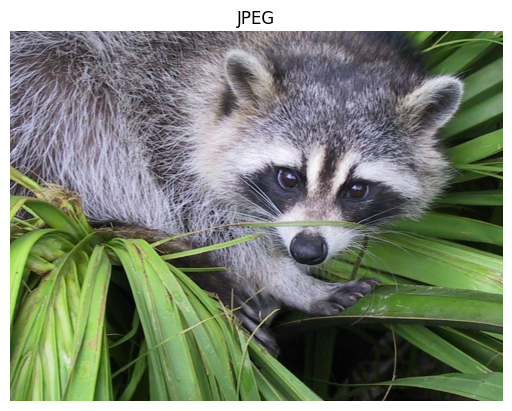

In [334]:
plt.title('JPEG')
plt.imshow(X_RGB_jpeg, cmap=plt.cm.gray)
plt.axis('off')
plt.show()